# Toy examples vizualizations

In this Notebook we consider toy examples to illustrate some useful techniques when using `sklearn` classifiers.

This will help you to practice your ML basics.

No sophisticated knowledge Python is required, so that you can just copy paste and adapt it in your TPs!

**Note:** this Notebook is yours and you are warmly encouraged to play with different settings, write some comments, etc.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Toy-examples-vizualizations" data-toc-modified-id="Toy-examples-vizualizations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Toy examples vizualizations</a></span></li><li><span><a href="#How-to-generate-your-toy-example" data-toc-modified-id="How-to-generate-your-toy-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How to generate your toy example</a></span></li><li><span><a href="#Display-the-decision-boundary-and-the-points" data-toc-modified-id="Display-the-decision-boundary-and-the-points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display the decision boundary and the points</a></span><ul class="toc-item"><li><span><a href="#Use-a-mesh-the-input-space" data-toc-modified-id="Use-a-mesh-the-input-space-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Use a mesh the input space</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>LogisticRegression</code></a></span></li><li><span><a href="#SVMs" data-toc-modified-id="SVMs-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SVMs</a></span></li></ul></li><li><span><a href="#Plot-a-LINEAR-decision-boundary" data-toc-modified-id="Plot-a-LINEAR-decision-boundary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot a LINEAR decision boundary</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SVMs-+-support-vectors" data-toc-modified-id="SVMs-+-support-vectors-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SVMs + support vectors</a></span></li></ul></li><li><span><a href="#Visualize-a-decision-tree" data-toc-modified-id="Visualize-a-decision-tree-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualize a decision tree</a></span></li><li><span><a href="#To-go-further" data-toc-modified-id="To-go-further-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>To go further</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use pandas to play with dataset
import pandas as pd

# use seaborn to display data
import seaborn as sns

# Algorithms of the day
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# To visualize trees 
import graphviz
from sklearn.tree import export_graphviz

# To generate you favorite toy example
from sklearn.datasets import make_blobs

# How to generate your toy example

`sklearn` allows you to build your favorite toy examples, click [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator) for more details.

In particular, if you wish to generate a mixture of isotropic gaussians you can use the `make_blobs` methods.

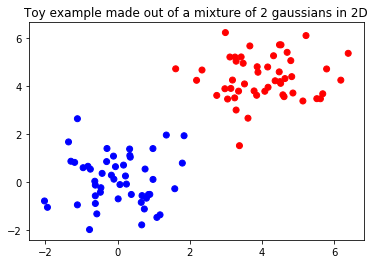

In [3]:
samples_per_class = 50

means = [[0, 0],
         [4, 4]]
stds = [1., 1.]

cols = np.array(['b', 'r'])

X_toy, y_toy = make_blobs(n_samples=len(means)*samples_per_class,
                          centers=means,
                          cluster_std=stds,
                          shuffle=False)
#                           random_state=12)

plt.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])
plt.title('Toy example made out of a mixture of 2 gaussians in 2D')
plt.show()

# Display the decision boundary and the points

## Use a mesh the input space

The prediction on a mesh `X_mesh` of the input space can visually act as a decision boundary (as we saw in TP1).

To do so you can use the following piece of code

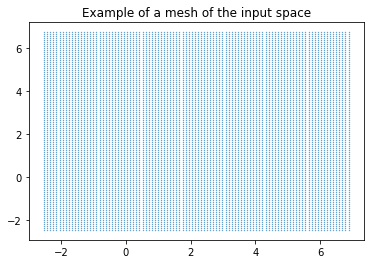

In [4]:
# Define the shape of a box that surrounds your points
x_min, x_max = X_toy[:, 0].min() - .5, X_toy[:, 0].max() + .5
y_min, y_max = X_toy[:, 1].min() - .5, X_toy[:, 1].max() + .5

# Mesh this box
x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
X_mesh = np.column_stack([x1.ravel(), x2.ravel()])

plt.title('Example of a mesh of the input space')
plt.scatter(X_mesh[:, 0], X_mesh[:, 1], s=0.1)
plt.show()

## `LogisticRegression`

Remember that the underlying optimization problem solved by `sklearn` reads in this case

$$
\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)
$$

so you can take $C\gg 1$ to work as if there was no regularization (the version of `LogisticRegression` you were taught in class)

In [5]:
log_reg = LogisticRegression(C=1e5)  # C large ~ no regularisation
log_reg.fit(X_toy, y_toy)

/home/dbaudry/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Predict the class of each point of the mesh

In [6]:
y_mesh = log_reg.predict(X_mesh)
y_mesh = y_mesh.reshape(x1.shape)

Plot the result

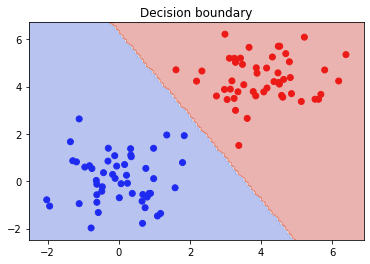

In [7]:
fig, ax = plt.subplots()

plt.title('Decision boundary')

# Plot data points
ax.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])

# Plot the predicted classes of the mesh
ax.contourf(x1, x2, y_mesh,
            alpha=0.4,
            cmap=plt.cm.coolwarm)

plt.show()

## SVMs

In [8]:
svm = SVC(kernel='rbf')
svm.fit(X_toy, y_toy)

/home/dbaudry/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Decision boundary

Text(0.5, 1.0, 'Decision boundary')

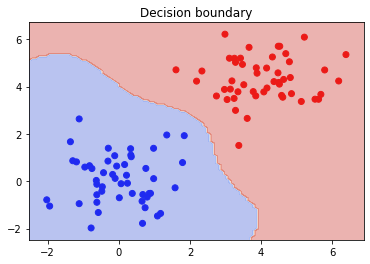

In [9]:
fig, ax = plt.subplots()

# Plot data points
ax.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])

# Predict the class of each point of the mesh
y_mesh = svm.predict(X_mesh)
# Plot the predicted classes of the mesh
y_mesh = y_mesh.reshape(x1.shape)
ax.contourf(x1, x2, y_mesh,
            alpha=0.4,
            cmap=plt.cm.coolwarm)

plt.title('Decision boundary')

# Plot a LINEAR decision boundary

A linear boundary appears only visually with the previous technique and it would be even better to plot it!

The equation of the linear boundary is given by

$\qquad \hat{w}_0 + \hat{w}_1 x_1 + \hat{w}_2 x_2 = 0$

where $\hat{w}$ is the estimation of $w$ made by the corresponding linear classifier.

## Logistic Regression

In [10]:
log_reg = LogisticRegression(C=1e5)  # C large ~ no regularisation
log_reg.fit(X_toy, y_toy)

/home/dbaudry/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

The estimated vector of coefficients $\hat{w}$ can be constructed as

In [11]:
w_hat = np.hstack([log_reg.intercept_, log_reg.coef_[0]])

So that

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Decision boundary')

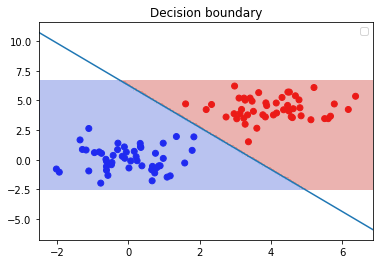

In [12]:
fig, ax = plt.subplots()

# Plot data points
ax.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])

# Predict the class of each point of the mesh
y_mesh = log_reg.predict(X_mesh)
# Plot the predicted classes of the mesh
y_mesh = y_mesh.reshape(x1.shape)
ax.contourf(x1, x2, y_mesh,
            alpha=0.4,
            cmap=plt.cm.coolwarm)

# Linear decision boundary
x_tmp = np.array([x_min, x_max])
w_hat = np.hstack([log_reg.intercept_, log_reg.coef_[0]])
y_tmp = -(w_hat[0] + w_hat[1]*x_tmp)/w_hat[2]
ax.plot(x_tmp, y_tmp)

plt.legend(loc='best')
plt.title('Decision boundary')

## SVMs + support vectors

In [13]:
svm = SVC(kernel='linear', C=1e5)
svm.fit(X_toy, y_toy)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Decision boundary')

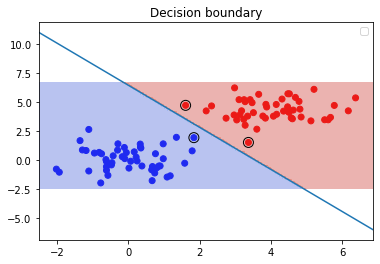

In [14]:
fig, ax = plt.subplots()

# Plot data points
ax.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])

# Predict the class of each point of the mesh
y_mesh = svm.predict(X_mesh)
# Plot the predicted classes of the mesh
y_mesh = y_mesh.reshape(x1.shape)
ax.contourf(x1, x2, y_mesh,
            alpha=0.4,
            cmap=plt.cm.coolwarm)

# Linear decision boundary
x_tmp = np.array([x_min, x_max])
w_hat = np.hstack([svm.intercept_, svm.coef_[0]])
y_tmp = -(w_hat[0] + w_hat[1]*x_tmp)/w_hat[2]
ax.plot(x_tmp, y_tmp)

# Support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.legend(loc='best')
plt.title('Decision boundary')

# Visualize a decision tree

For this you can you the `export_graphviz` method

In [15]:
tree = DecisionTreeClassifier()
tree.fit(X_toy, y_toy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Decision function')

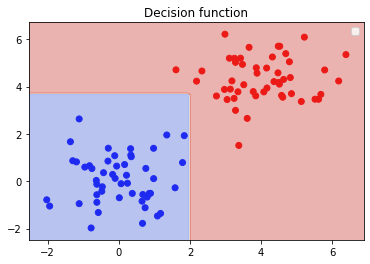

In [16]:
fig, ax = plt.subplots()

# Toy data set

plt.scatter(X_toy[:,0], X_toy[:,1], c=cols[y_toy])

y_mesh = tree.predict(X_mesh)
y_mesh = y_mesh.reshape(x1.shape)

# Boundary as regions
ax.contourf(x1, x2, y_mesh,
            alpha=0.4,
            cmap=plt.cm.coolwarm)

plt.legend(loc='best')
plt.title('Decision function')

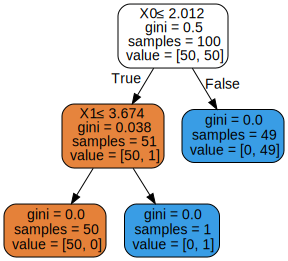

In [23]:
dot_data = export_graphviz(tree, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#graph.render('graph') # to export in .pdf

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

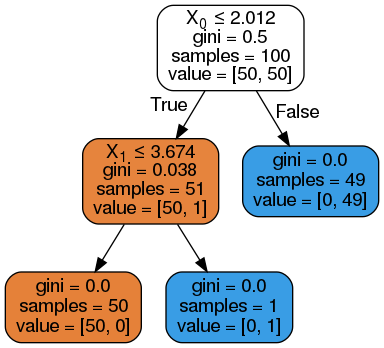

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# To go further

Play with your favorite classification technique on

1. more complex data (non isotropic gaussians, moons, ...)  click [here](https://scikit-learn.org/stable/modules/classes.html#samples-generator) for more inspiration.
2. a multiclass classification task of your choice